<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/tf_ImageDataGenerator_flowfrom_df_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to Apply K-Fold Averaging on Deep Learning Classifier](https://www.analyticsvidhya.com/blog/2021/09/how-to-apply-k-fold-averaging-on-deep-learning-classifier/)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/tdata.zip" .

Mounted at /content/drive


In [2]:
temp_dir = './temp'
train_dir = temp_dir + "/tdata/train"
test_dir = temp_dir + "/tdata/test"

In [3]:
import shutil
import os

if os.path.isdir(temp_dir):
  shutil.rmtree(temp_dir)

In [4]:
import shutil
import zipfile
shutil.unpack_archive('tdata.zip', temp_dir)

In [14]:
import pandas as pd
df = pd.read_csv(temp_dir+"/tdata/train.csv")


rep = {5:7}
df["gender_status"] = df["gender_status"].replace(rep).astype(int)
display(df)

,image,gender_status
0,n_00001.jpg,4
1,n_00002.jpg,0
2,n_00003.jpg,0
3,n_00005.jpg,0
4,n_00006.jpg,0
...,...,...
4233,n_05293.jpg,1
4234,n_05294.jpg,1
4235,n_05295.jpg,0
4236,n_05296.jpg,0


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, # 255で割ることで正規化
                                   zoom_range=0.2, # ランダムにズーム
                                   horizontal_flip = True, # 水平反転
                                   rotation_range = 20, # ランダムに回転
                                   vertical_flip = False, # 垂直反転
                                   featurewise_center=True,
                                   validation_split = 0.2
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

N_SPLIT = 3

# Storing the average of all predictions
main_pred = []
data_kfold = pd.DataFrame()

# k-fold
kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

In [17]:
df['gender_status'] = df['gender_status'].astype(str)
train_x = df["image"]
train_y = df["gender_status"]

# Variable for keeping count of split we are executing
j = 0
# K-fold Train and test for each split
for train_idx, val_idx in list(kfold.split(train_x,train_y)):
  x_train_df = df.iloc[train_idx]
  x_valid_df = df.iloc[val_idx]

  j+=1

  train_generator = train_datagen.flow_from_dataframe(dataframe=x_train_df,
                                                      directory=train_dir,
                                                      x_col="image",
                                                      y_col="gender_status",
                                                      class_mode='categorical',
                                                      target_size=(256,256),
                                                      batch_size=32,
                                                      shuffle=True,
                                                      subset = "training")

  train_generator = train_datagen.flow_from_dataframe(dataframe=x_valid_df,
                                                      directory=train_dir,
                                                      x_col="image",
                                                      y_col="gender_status",
                                                      class_mode='categorical',
                                                      target_size=(256,256),
                                                      batch_size=32,
                                                      shuffle=True,
                                                      subset = "validation")

Found 2260 validated image filenames belonging to 7 classes.
Found 282 validated image filenames belonging to 7 classes.
Found 2260 validated image filenames belonging to 7 classes.
Found 282 validated image filenames belonging to 7 classes.
Found 2261 validated image filenames belonging to 7 classes.
Found 282 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


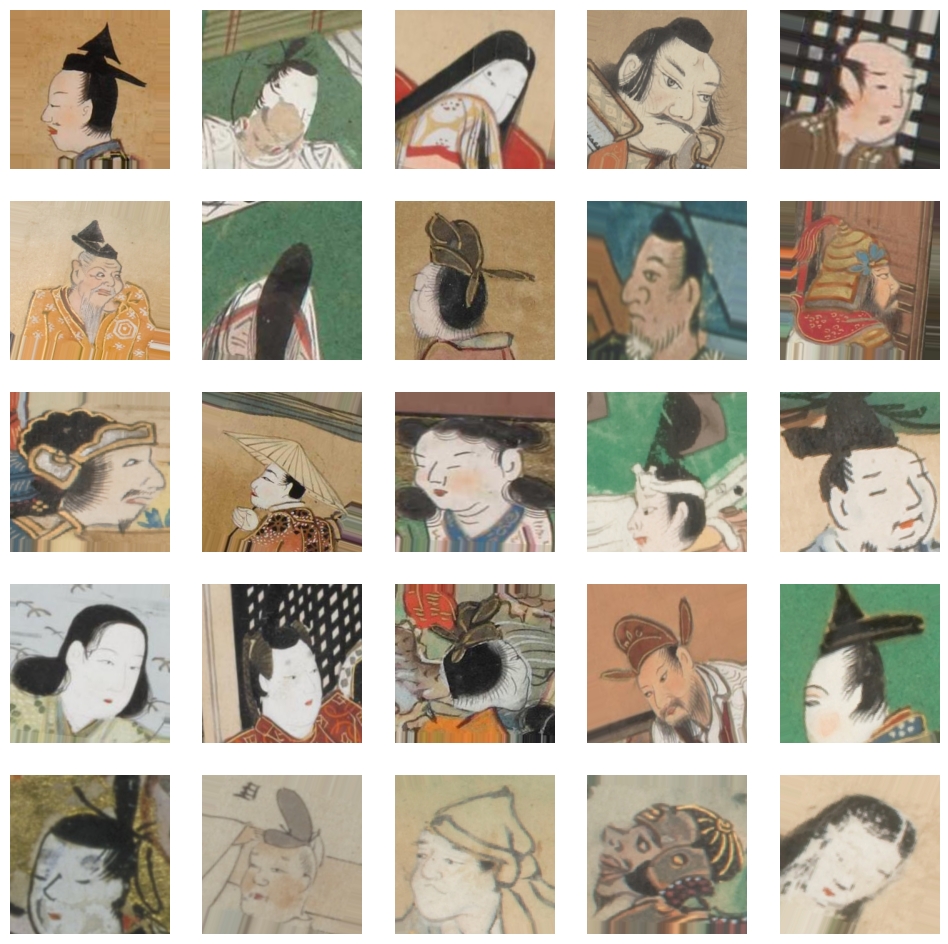

In [18]:
import matplotlib.pyplot as plt
# 1バッチ分取り出す(64個の画像）
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


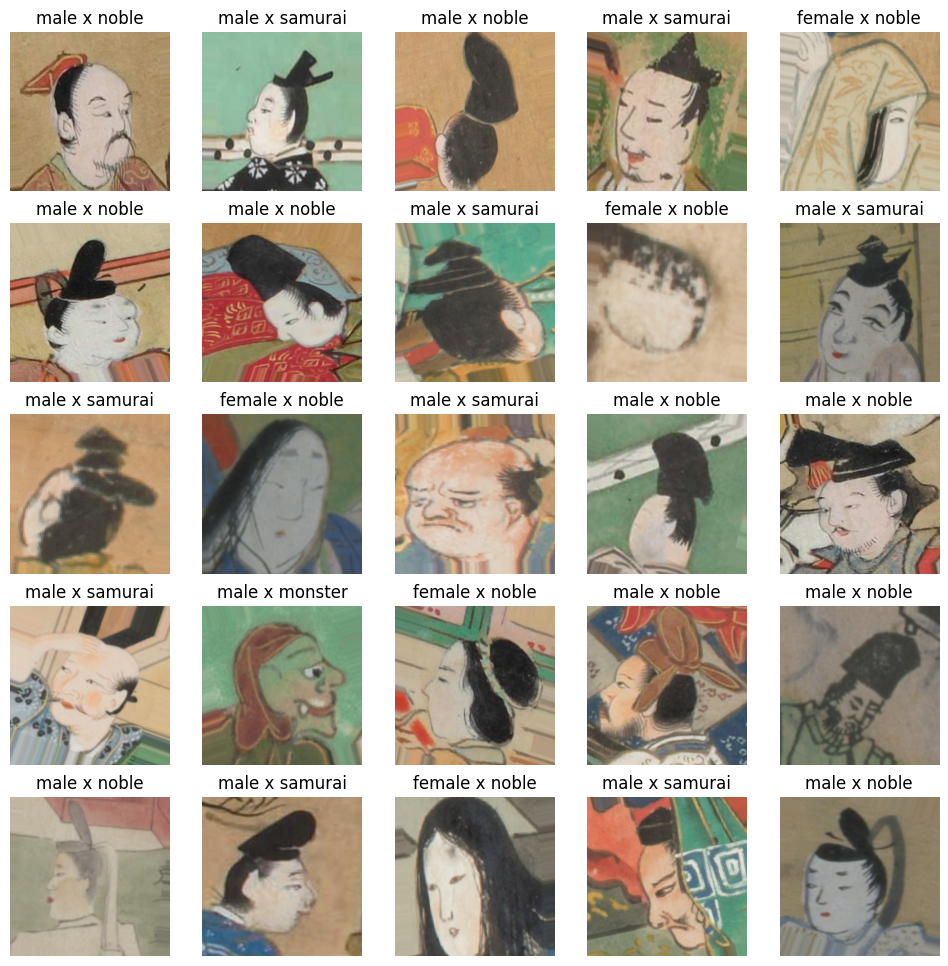

In [19]:
import numpy as np
# indexからラベル名に戻すための辞書を定義
index2label_dict = {
    0 : 'male x noble',
    1 : 'male x samurai',
    2 : 'male x monster',
    3 : 'male x common',
    4 : 'female x noble',
    5 : 'femele x samurai',
    6 : 'female x monster',
    7 : 'female x common'
}

items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    label_index = np.argmax(items[1][i-1])
    label_name = index2label_dict[label_index]
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')